In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, accuracy_score, roc_curve, auc, precision_recall_fscore_support
from sklearn.feature_extraction import DictVectorizer

from IPython.display import display
import pickle

ModuleNotFoundError: No module named 'xgboost'

Data Preparation

In [ ]:
df = pd.read_csv('datasets/borrower_data.csv')

df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
emp_length_median = df['person_emp_length'].median()

df['person_emp_length'] = df['person_emp_length'].fillna(emp_length_median)

blank_int_rate_indices = df[df['loan_int_rate'].isna()].index

df.drop(blank_int_rate_indices, inplace=True)

df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

Exploratory Data Analysis

In [ ]:
numerical_cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income']

categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade']

target_col = 'loan_status'

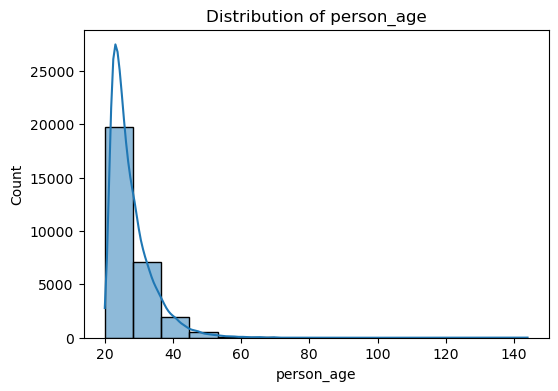

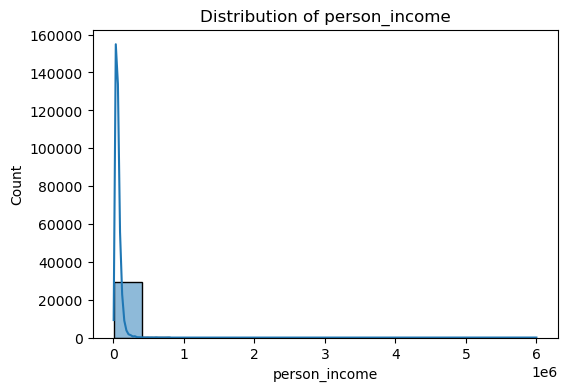

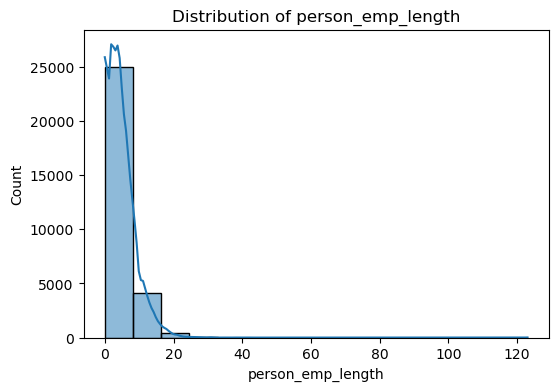

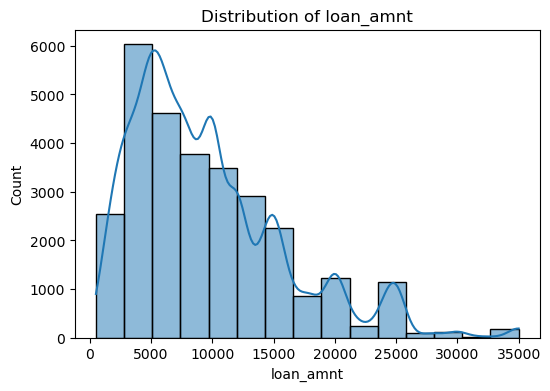

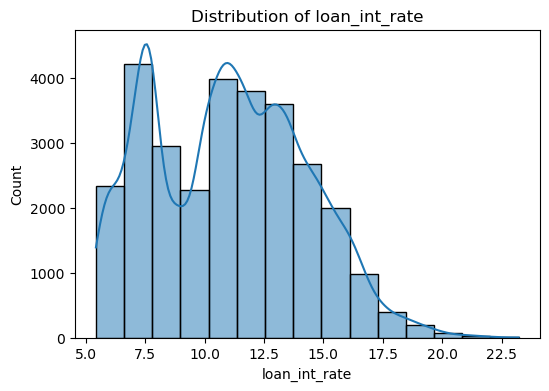

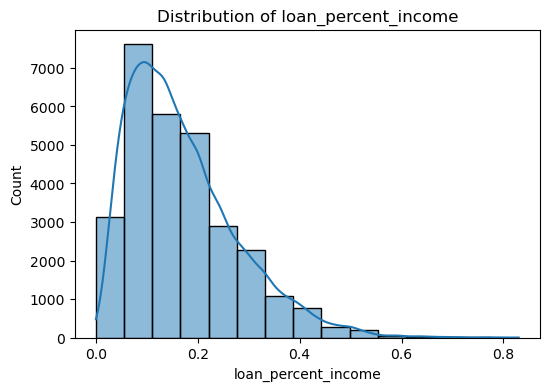

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=15, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


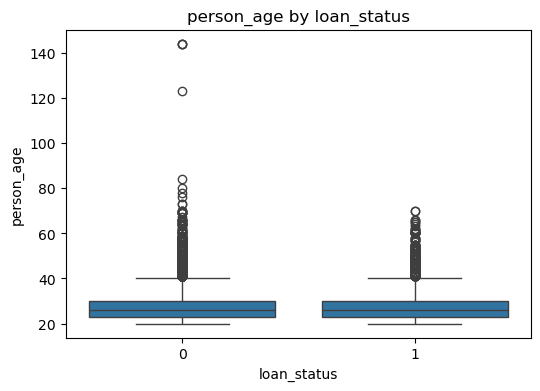

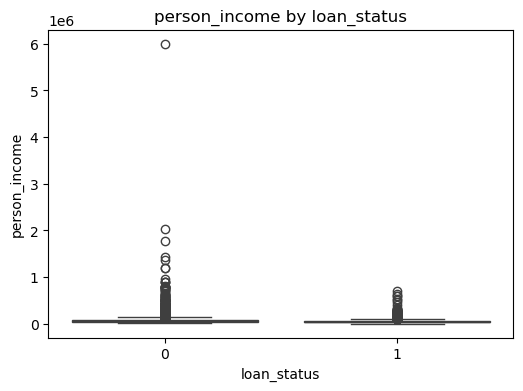

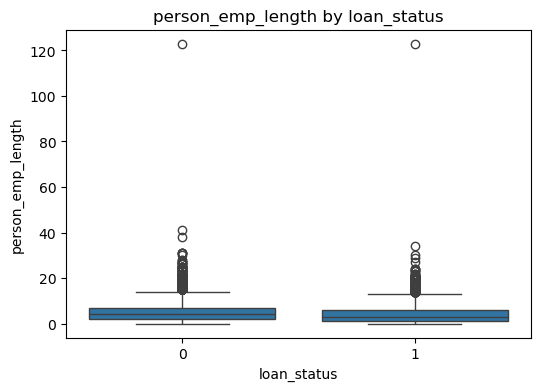

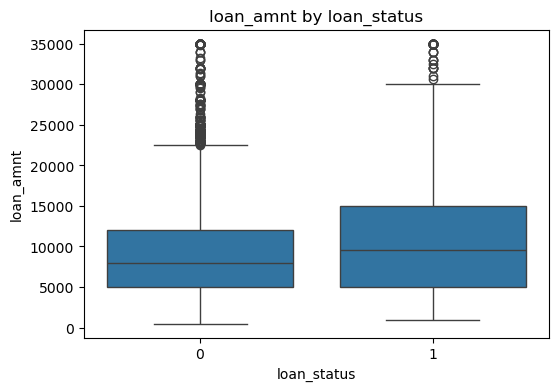

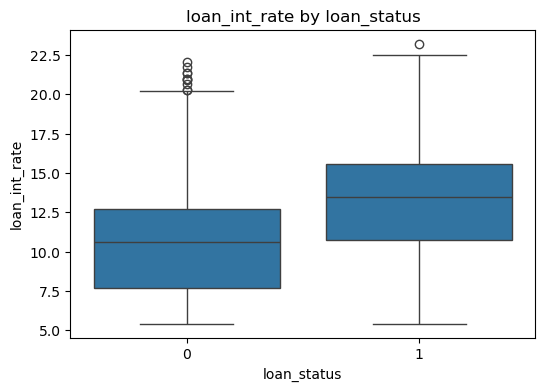

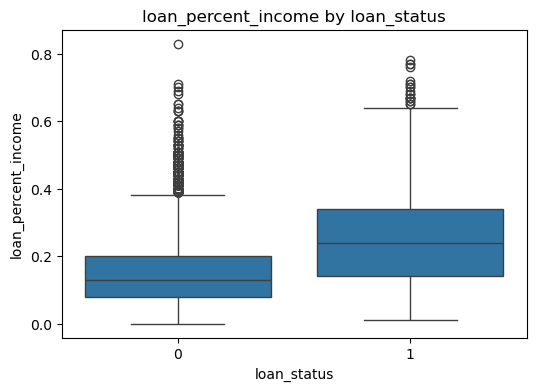

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=target_col, y=col, data=df)
    plt.title(f"{col} by {target_col}")
    plt.xlabel(target_col)
    plt.ylabel(col)
    plt.show()


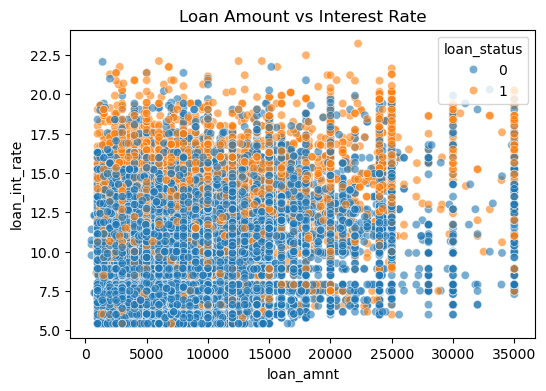

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df,
    x='loan_amnt',
    y='loan_int_rate',
    hue=target_col,
    alpha=0.6
)
plt.title("Loan Amount vs Interest Rate")
plt.show()


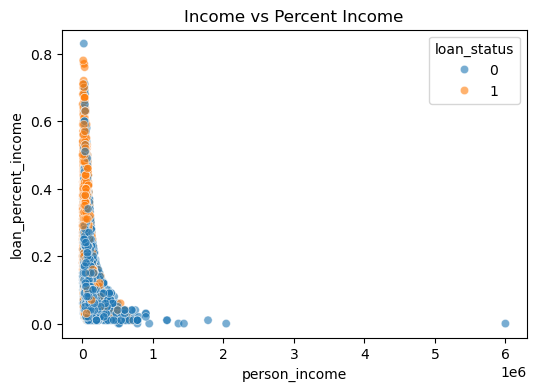

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df,
    x='person_income',
    y='loan_percent_income',
    hue=target_col,
    alpha=0.6
)
plt.title("Income vs Percent Income")
plt.show()


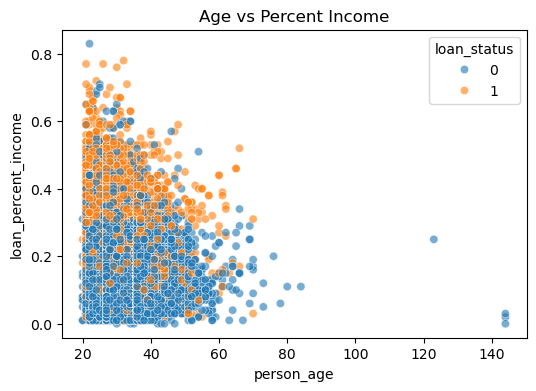

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df,
    x='person_age',
    y='loan_percent_income',
    hue=target_col,
    alpha=0.6
)
plt.title("Age vs Percent Income")
plt.show()


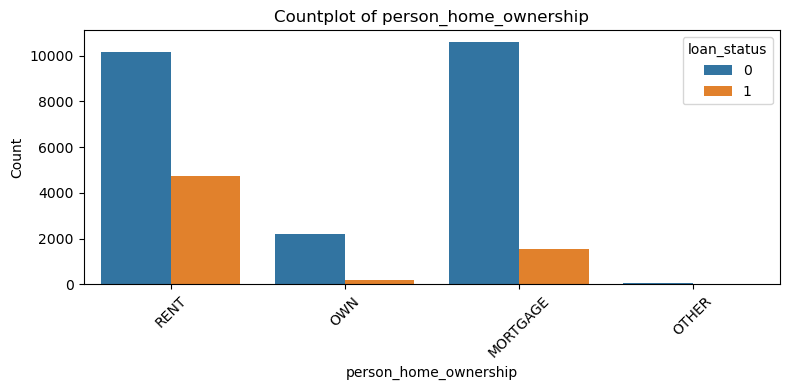

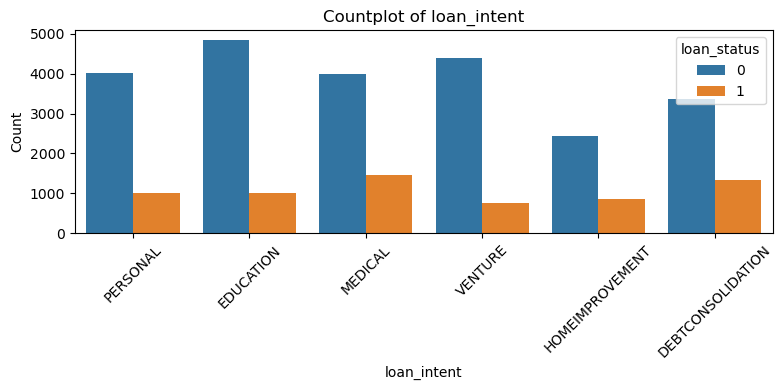

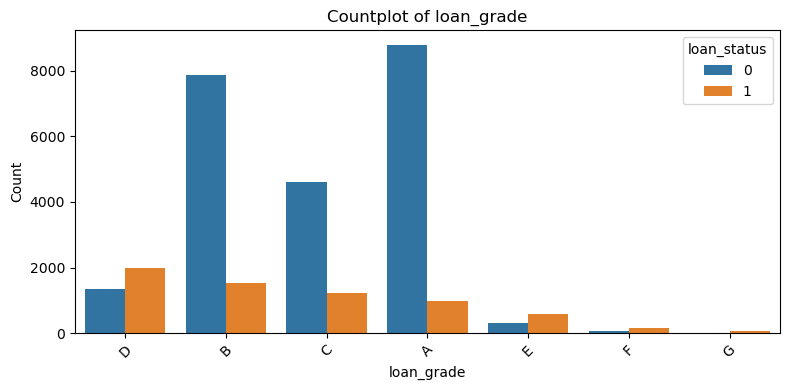

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue=target_col, data=df)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


Train Test Split

In [ ]:
X = df[numerical_cols + categorical_cols]

y = df[target_col]

df_full_train, df_test, y_full_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df_train, df_val, y_train, y_val = train_test_split(df_full_train, y_full_train, test_size=0.25, random_state=42)

In [ ]:
X_train = pd.get_dummies(df_train)

X_val = pd.get_dummies(df_val)

X_test = pd.get_dummies(df_test)

X_full_train = pd.get_dummies(df_full_train)

Train XGBoost

In [ ]:
model = XGBClassifier()

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_proba = model.predict_proba(X_train)[:, 1]

roc_auc_score(y_train, y_proba)

np.float64(0.9933623483156431)

In [ ]:
y_proba = model.predict_proba(X_val)[:, 1]

roc_auc_score(y_val, y_proba)

np.float64(0.9473474718785577)

In [ ]:
y_pred = model.predict(X_val)

accuracy_score(y_val, y_pred)

0.9343288647547938

Fine Tune Logistic Regression

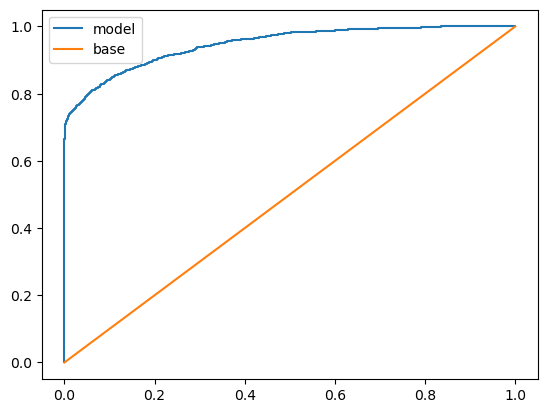

In [ ]:
fpr, tpr, thresh = roc_curve(y_val, y_proba)

plt.plot(fpr, tpr, label='model')
plt.plot([0,1], [0,1], label='base')
plt.legend()

In [ ]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4595
           1       0.95      0.74      0.83      1298

    accuracy                           0.93      5893
   macro avg       0.94      0.86      0.90      5893
weighted avg       0.94      0.93      0.93      5893



In [ ]:
print(model.get_booster().get_score(importance_type='weight'))

{'person_age': 362.0, 'person_income': 714.0, 'person_emp_length': 336.0, 'loan_amnt': 367.0, 'loan_int_rate': 580.0, 'loan_percent_income': 286.0, 'person_home_ownership_MORTGAGE': 51.0, 'person_home_ownership_OTHER': 6.0, 'person_home_ownership_OWN': 45.0, 'person_home_ownership_RENT': 74.0, 'loan_intent_DEBTCONSOLIDATION': 56.0, 'loan_intent_EDUCATION': 36.0, 'loan_intent_HOMEIMPROVEMENT': 61.0, 'loan_intent_MEDICAL': 72.0, 'loan_intent_PERSONAL': 37.0, 'loan_intent_VENTURE': 36.0, 'loan_grade_A': 7.0, 'loan_grade_B': 34.0, 'loan_grade_C': 62.0, 'loan_grade_D': 53.0, 'loan_grade_E': 13.0, 'loan_grade_F': 6.0, 'loan_grade_G': 12.0}


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

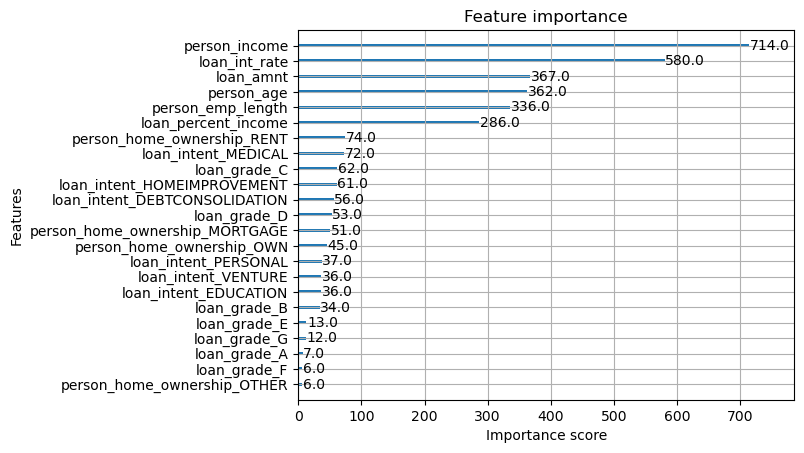

In [ ]:
xgb.plot_importance(model.get_booster(), importance_type='weight')

Cross-validation

In [ ]:
n_folds = 5
early_stopping = 10

params = {'objective': 'binary:logistic', 'seed': 123, 'eval_metric': 'auc'}

DTrain = xgb.DMatrix(X_train, label = y_train)

cv_df = xgb.cv(params, DTrain, num_boost_round = 5, nfold=n_folds,
            early_stopping_rounds=early_stopping)

print(cv_df)

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.903603       0.002122       0.896595      0.007892
1        0.912921       0.002179       0.905677      0.008091
2        0.918537       0.001904       0.911205      0.006854
3        0.923702       0.001564       0.914890      0.006009
4        0.927678       0.001627       0.917248      0.006197


In [ ]:
model = XGBClassifier(learning_rate = 0.1, max_depth = 7)

cv_scores = cross_val_score(model, X_train, np.ravel(y_train), cv = 4)

print(cv_scores)

print("Average accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(),
                                              cv_scores.std() * 2))

[0.92714932 0.93846154 0.93257919 0.93573207]
Average accuracy: 0.93 (+/- 0.01)


Train Final Model


In [ ]:
model = XGBClassifier(learning_rate = 0.1, max_depth = 7)

model.fit(X_full_train, y_full_train)

y_proba = model.predict(X_test)

roc_auc_score(y_test, y_proba)

np.float64(0.8592767767517399)

In [ ]:
print(classification_report(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4585
           1       0.97      0.72      0.83      1308

    accuracy                           0.93      5893
   macro avg       0.95      0.86      0.90      5893
weighted avg       0.94      0.93      0.93      5893



In [ ]:
output_file = 'model/model_lr=0.1_md=7'

with open(output_file, 'wb') as f_out:

    pickle.dump(model, f_out)